# Домашнее задание

Практика по PyTorch

**Цель**:

В этом ДЗ вы попрактикуетесь с PyTorch.

**Описание/Пошаговая инструкция выполнения домашнего задания:**

Задание:

1. Используя PyTorch, создать и обучить регрессионную модель, которая аппроксимирует значение функции sin(x + 2*y)exp(-(2x + y)^2) на диапазоне значений [-10; 10] по х и у;
2. В качестве обучающей выборки необходимо сгенерировать 20000 точек случайным образом;
3. Разделить получившийся датасет на train / test / val в отношениях 70% / 15% / 15%, соответственно;


Результаты:

- Посчитать метрику Mean Square Error (MSE) на test;
- Нарисовать график, в котором сравнивается истинная функция и ее аппроксимированный вариант (предсказываемый моделью);


In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Step 1: Generate the dataset
x = np.random.uniform(-10, 10, 20000)
y = np.random.uniform(-10, 10, 20000)
z = np.sin(x + 2 * y) * np.exp(-(2 * x + y) ** 2)

# Convert to PyTorch tensors
X = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
Z = torch.tensor(z, dtype=torch.float32).view(-1, 1)

In [5]:
# Step 2: Split the dataset
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Z_train, Z_test = Z[:train_size], Z[train_size:]

In [6]:
# Step 3: Define the model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionModel()

In [7]:
# Step 4: Train the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Z_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 0.0157
Epoch [200/5000], Loss: 0.0156
Epoch [300/5000], Loss: 0.0155
Epoch [400/5000], Loss: 0.0153
Epoch [500/5000], Loss: 0.0151
Epoch [600/5000], Loss: 0.0148
Epoch [700/5000], Loss: 0.0143
Epoch [800/5000], Loss: 0.0140
Epoch [900/5000], Loss: 0.0135
Epoch [1000/5000], Loss: 0.0132
Epoch [1100/5000], Loss: 0.0125
Epoch [1200/5000], Loss: 0.0119
Epoch [1300/5000], Loss: 0.0107
Epoch [1400/5000], Loss: 0.0101
Epoch [1500/5000], Loss: 0.0123
Epoch [1600/5000], Loss: 0.0085
Epoch [1700/5000], Loss: 0.0082
Epoch [1800/5000], Loss: 0.0071
Epoch [1900/5000], Loss: 0.0064
Epoch [2000/5000], Loss: 0.0063
Epoch [2100/5000], Loss: 0.0058
Epoch [2200/5000], Loss: 0.0050
Epoch [2300/5000], Loss: 0.0042
Epoch [2400/5000], Loss: 0.0037
Epoch [2500/5000], Loss: 0.0037
Epoch [2600/5000], Loss: 0.0032
Epoch [2700/5000], Loss: 0.0036
Epoch [2800/5000], Loss: 0.0025
Epoch [2900/5000], Loss: 0.0024
Epoch [3000/5000], Loss: 0.0024
Epoch [3100/5000], Loss: 0.0018
Epoch [3200/5000]

In [8]:
# Step 5: Evaluate our model
model.eval()
with torch.no_grad():
    Z_pred = model(X_test)
    mse = criterion(Z_pred, Z_test).item()
    print(f'Mean Square Error on test set: {mse}')

Mean Square Error on test set: 0.001396167790517211


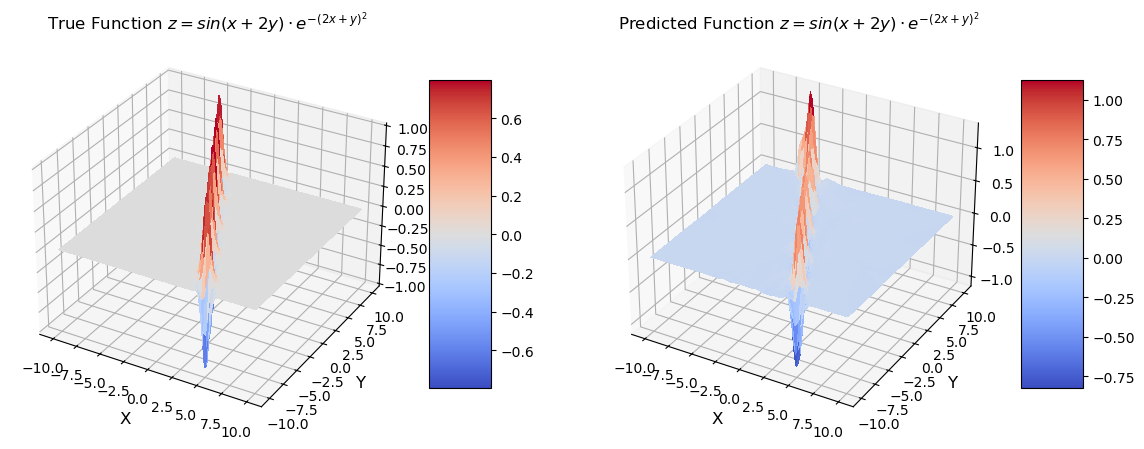

In [9]:
# Step 6: Visualizing the results
# Grid of points for visualization
x_grid = np.linspace(-10, 10, 100)
y_grid = np.linspace(-10, 10, 100)
X1, Y1 = np.meshgrid(x_grid, y_grid)
Z_true = np.sin(X1 + 2 * Y1) * np.exp(-(2 * X1 + Y1) ** 2)

# Predict on the grid
X_grid_tensor = torch.tensor(np.column_stack((X1.ravel(), Y1.ravel())), dtype=torch.float32)
Z_pred_grid = model(X_grid_tensor).detach().numpy().reshape(X1.shape)

# Plotting
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plt.title('True Function $ z = sin(x + 2y) \cdot e^{-(2x + y)^2} $')
surf1 = ax.plot_surface(X1, Y1, Z_true, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf1, shrink=0.5, aspect=5)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('Predicted Function $ z = sin(x + 2y) \cdot e^{-(2x + y)^2} $')
surf2 = ax.plot_surface(X1, Y1, Z_pred_grid, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf2, shrink=0.5, aspect=5)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

plt.show();